## This is multimodal rag part four i was about to do it with google gemini but then decided to do it using groq - llama-vision and hugging face model 

**although it did not worked as expected but i learned a lot**

### Importing libraries according to out requirements

In [84]:
import os
import requests
from PIL import Image

In [85]:
from langchain_core.messages import HumanMessage, SystemMessage


text loader

In [86]:

from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

In [87]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [88]:
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings


### Vector Databases

In [89]:
from langchain.vectorstores import FAISS
from langchain.vectorstores import DocArrayInMemorySearch

### setup environment

In [90]:
# dotenv ko use karenge environment variables load karne ke liye
import os
from dotenv import load_dotenv

load_dotenv()  # Environment variables load karte hain

# Grok API Key
grok_api_key = os.getenv("GROK_API_KEY")
HF_TOKEN = os.getenv("HF_TOKEN")


### llm_model = ChatGroq(model="llama-3.2-11b-vision-preview", groq_api_key=grok_api_key)

In [91]:
def load_model(model_name):
  if model_name=="Gemma2":
    llm = ChatGroq(model="Gemma2-9b-It", groq_api_key=grok_api_key)
  else:
    llm= ChatGroq(model="llama-3.2-11b-vision-preview", groq_api_key=grok_api_key)

  return llm

### Testing model endpoint

In [92]:
model_text=load_model("Gemma2")

In [93]:
model_text.invoke("please come up with the best funny line.* Example: I used to be addicted to soap, but I m clean now.").content

"Why don't scientists trust atoms? \n\nBecause they make up everything! \n\n\nLet me know if you'd like to hear another one! 😊  \n"

In [94]:
model_text(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is apple a Fruit?")
    ]
).content

'Yes.'

**loading image**  
---

In [95]:
if not os.path.exists('content'):
        os.makedirs('content')

In [96]:
import os
import requests
from PIL import Image

def get_image(url, filename, extension):
    # Ensure the 'content' directory exists
    if not os.path.exists('content'):
        os.makedirs('content')
    
    # Download the content from the URL
    content = requests.get(url).content
    
    # Save the content to a file in the 'content' directory
    file_path = f'content/{filename}.{extension}'
    with open(file_path, 'wb') as f:
        f.write(content)
    
    # Open the saved image
    image = Image.open(file_path)
    
    # Display the image
    # image.show()
    
    # Return the image object
    return image


In [97]:
image = get_image("https://png.pngitem.com/pimgs/s/555-5550642_nike-shoe-png-transparent-png.png",
                  "nike-shoes",
                  "png")

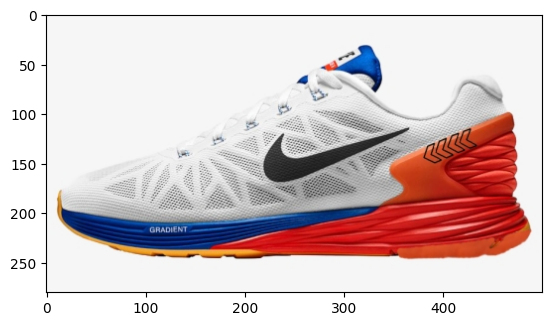

In [98]:

plt.imshow(image)
plt.show()

**Load image model**

In [121]:
prompt="give me summary of this image in 5 words"

from groq import Groq

# Initialize the Groq client with your API key
client = Groq(api_key=grok_api_key)

# Send the request to the Groq model
completion = client.chat.completions.create(
    model="llama-3.2-11b-vision-preview",  # Model you're using
    messages=[  # List of messages
        {
            "role": "user",
            "content": prompt  # Text query
        },
        {
            "role": "user",  # Same role for the image
            "content": url
# vision_model"  # Direct URL of the image
        }
    ],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=False,
    stop=None,
)

# Print out the entire response to inspect its content
# print(completion)  # Check the full response for insights
print(completion.choices[0].message.content)  # Access the first choice's message specifically


Nike Air Force 1 casual shoes.


In [122]:
loader = TextLoader("content/nike_shoes.txt")
print(loader.load()[0].page_content)

Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.
Here are some more details about the Nike Air Max Plus:
Style: TN
Release date: January 1, 2017
Style code: 852630-300
Original retail price: $150 USD
The Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.
It features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.
Nike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".
\n\n\n



Nike Dunk Low Retro sneakers.
Here are some more details about the Nike Dunk Low Retro:
Style: Low-top
Release date: October 31

In [123]:
text = loader.load()[0].page_content

In [124]:
from langchain.text_splitter import CharacterTextSplitter

In [125]:

def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

In [126]:
docs = get_text_chunks_langchain(text)


Created a chunk of size 869, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 654, which is longer than the specified 20
Created a chunk of size 594, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 660, which is longer than the specified 20
Created a chunk of size 516, which is longer than the specified 20
Created a chunk of size 528, which is longer than the specified 20


In [127]:
from langchain_google_genai import ChatGoogleGenerativeAI


model_name = "sentence-transformers/all-MiniLM-L6-v2"
embeddings = HuggingFaceEmbeddings(model_name=model_name)

In [128]:
vectorstore = FAISS.from_documents(docs,embedding=embeddings)


In [129]:
retriever=vectorstore.as_retriever()
retriever.invoke("Nike slide/sandal.")



[Document(id='c64e1e93-2ecd-4fa0-b27c-b80ce2a1881f', metadata={}, page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.\nPhylon midsole: The midsole is made of Phylon, which provides cushioning and support.\nRubber outsole: The outsole is made of rubber for traction and durability.\nSwoosh logo: The Nike Swoosh logo is on the strap of the sandal.\nAvailable in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.\nNike off courte slides store location: "Bhaktapur, Nepal".\n\\n\\n\\n'),
 Document(id='82a69522-a28a-4302-b033-9d4c605076fe', metadata={}, page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is ma

In [130]:
from langchain.prompts import ChatPromptTemplate

template = """
```
{context}
```

{query}


Provide brief information and store location.
"""
prompt = ChatPromptTemplate.from_template(template)


In [131]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

In [132]:
rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | model_text
    | StrOutputParser()
)

In [133]:
result = rag_chain.invoke("can you give me a detail of nike sandal?")
result

"The Nike sandal described is the **Nike Benassi Solarsoft Sandal**. \n\nHere's what we know:\n\n* **Style:** Unisex slide/sandal\n* **Features:** Soft, one-piece upper made of synthetic material, Phylon midsole for cushioning and support, rubber outsole for traction and durability, Nike Swoosh logo on the strap.\n* **Colors:** Available in black, white, and beige, as well as other colors.\n\n**Store Location:** Bhaktapur, Nepal \n\n\nLet me know if you have any other questions about Nike products! \n"

In [134]:
rag_chain


{
  context: VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000176BC6E6290>, search_kwargs={}),
  query: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information and store location.\n'), additional_kwargs={})])
| ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000176B69167D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000176BC4ADE90>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))
| StrOutputParser()

In [135]:
vision_model=load_model(completion)
vision_model


ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000176BC6ED710>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000176BC6FDF10>, model_name='llama-3.2-11b-vision-preview', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [136]:
full_chain = (
    RunnablePassthrough() | vision_model | StrOutputParser() | rag_chain
)

In [137]:
full_chain


RunnablePassthrough()
| ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000176BC6ED710>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000176BC6FDF10>, model_name='llama-3.2-11b-vision-preview', model_kwargs={}, groq_api_key=SecretStr('**********'))
| StrOutputParser()
| {
    context: VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000176BC6E6290>, search_kwargs={}),
    query: RunnablePassthrough()
  }
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information and store location.\n'), additional_kwargs={})])
| ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000176B69167D0>,

In [138]:
# image_url = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/252f2db6-d426-4931-80a0-8b7f8f875536/calm-slides-K7mr3W.png"


In [139]:
url = "https://static.nike.com/a/images/t_PDP_936_v1/f_auto,q_auto:eco/7ccbde3c-6b29-4027-ad8a-bdbd84426c1d/W+AIR+FORCE+1+%2707+NEXT+NATURE.png"

In [140]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information on given sandle image Brand and model.",
        },  # You can optionally provide text parts
        {"type": "image_url", "url": url},
    ]
)


In [153]:
result = full_chain.invoke([message])

BadRequestError: Error code: 400 - {'error': {'message': "'messages.0' : for 'role:user' the following must be satisfied[('messages.0.content' : one of the following must be satisfied[('messages.0.content' : value must be a string) OR ('messages.0.content.1' : one of the following must be satisfied[('messages.0.content.1.type' : value is not one of the allowed values ['text']) OR ('messages.0.content.1.image_url' : property 'image_url' is missing)])])]", 'type': 'invalid_request_error'}}

In [152]:


# Display the result as Markdown
display(Markdown(result))

The Nike sandal described is the **Nike Benassi Solarsoft Sandal**. 

Here's what we know:

* **Style:** Unisex slide/sandal
* **Features:** Soft, one-piece upper made of synthetic material, Phylon midsole for cushioning and support, rubber outsole for traction and durability, Nike Swoosh logo on the strap.
* **Colors:** Available in black, white, and beige, as well as other colors.

**Store Location:** Bhaktapur, Nepal 


Let me know if you have any other questions about Nike products! 


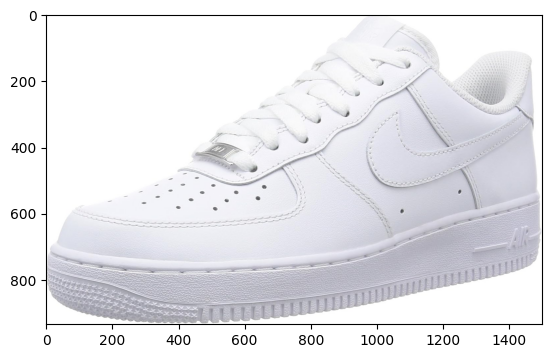

Created a chunk of size 869, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 654, which is longer than the specified 20
Created a chunk of size 594, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 660, which is longer than the specified 20
Created a chunk of size 516, which is longer than the specified 20
Created a chunk of size 528, which is longer than the specified 20


Nike Air Force 1 Sneaker.
[Document(id='35e1d3ca-d28a-42c6-9a6d-16618027736b', metadata={}, page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.\nPhylon midsole: The midsole is made of Phylon, which provides cushioning and support.\nRubber outsole: The outsole is made of rubber for traction and durability.\nSwoosh logo: The Nike Swoosh logo is on the strap of the sandal.\nAvailable in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.\nNike off courte slides store location: "Bhaktapur, Nepal".\n\\n\\n\\n'), Document(id='0b304414-e2d3-46d4-bec9-49c32d0a8e47', metadata={}, page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-pie

In [159]:
import os
import requests
from PIL import Image
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from dotenv import load_dotenv
from groq import Groq

# Load environment variables
load_dotenv()  # Load environment variables from .env file

# API Keys
grok_api_key = os.getenv("GROK_API_KEY")
HF_TOKEN = os.getenv("HF_TOKEN")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

def load_model(model_name):
    if model_name == "Gemma2":
        llm = ChatGroq(model="Gemma2-9b-It", groq_api_key=grok_api_key)
    else:
        llm = ChatGroq(model="llama-3.2-11b-vision-preview", groq_api_key=grok_api_key)
    return llm

# Model initialization
model_text = load_model("Gemma2")
model_vision = load_model("llama-3.2-11b-vision-preview")

def get_image(url, filename, extension):
    if not os.path.exists('content'):
        os.makedirs('content')
    content = requests.get(url).content
    file_path = f'content/{filename}.{extension}'
    with open(file_path, 'wb') as f:
        f.write(content)
    image = Image.open(file_path)
    return image

# Image URL
image_url = "https://images-cdn.ubuy.co.in/64ada0cffc64d6627d002728-nike-unisex-adult-air-force-1.jpg"
image = get_image(image_url, "nike-shoes", "png")
plt.imshow(image)
plt.show()

# Processing the image through the vision model
prompt = "give me summary of this image in 5 words"
client = Groq(api_key=grok_api_key)
completion = client.chat.completions.create(
    model="llama-3.2-11b-vision-preview",
    messages=[
        {"role": "user", "content": prompt},
        {"role": "user", "content": image_url}
    ],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=False,
    stop=None,
)
print(completion.choices[0].message.content)

# Load text data and process
loader = TextLoader("content/nike_shoes.txt")
text = loader.load()[0].page_content
from langchain.text_splitter import CharacterTextSplitter

def get_text_chunks_langchain(text):
    text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
    docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
    return docs

docs = get_text_chunks_langchain(text)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.from_documents(docs, embedding=embeddings)
retriever = vectorstore.as_retriever()
print(retriever.invoke("Nike slide/sandal."))




In [160]:
from langchain.prompts import ChatPromptTemplate
template = """
{query}

Provide brief information and store location.
"""
prompt = ChatPromptTemplate.from_template(template)
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | model_text
    | StrOutputParser()
)

result = rag_chain.invoke("can you give me a detail of nike sandal?")
print(result)

full_chain = (
    RunnablePassthrough() | model_vision | StrOutputParser() | rag_chain
)

message = HumanMessage(
    content="Provide information on given sandal image Brand and model. Here is the image.",
    attachments=[
        {"type": "image_url", "url": image_url}
    ]
)

try:
    result = full_chain.invoke([message])
    display(Markdown(result))
except Exception as e:
    print(f"Error: {e}")


Please provide me with more information about the Nike sandal you're interested in! 

To give you the best details, I need to know things like:

* **Specific model name:**  (e.g.,  Nike Benassi,  Nike Slides, Nike Air Zoom Terra Kiger 7)
* **Features:** (e.g.,  adjustable straps, water-resistant, arch support)
* **Color or design:** (e.g., black, white, floral)

Once you tell me more, I can find details about the sandal and let you know where to buy it! 👟☀️ 




Please tell me about the sandals! I'm ready to put my knowledge to the test and see if I can help you figure out the brand and model.  🕵️‍♀️ 👡  



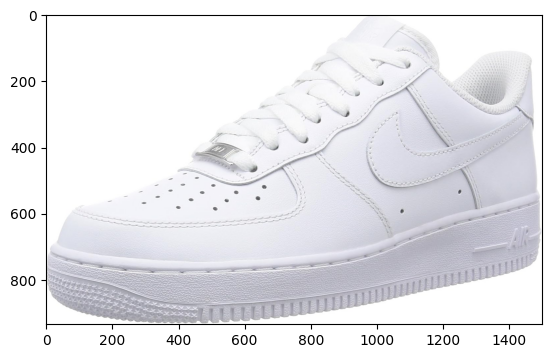

Created a chunk of size 869, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 654, which is longer than the specified 20
Created a chunk of size 594, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 660, which is longer than the specified 20
Created a chunk of size 516, which is longer than the specified 20
Created a chunk of size 528, which is longer than the specified 20


Nike Air Force 1 Canvas


In [164]:
import os
import requests
from PIL import Image
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from dotenv import load_dotenv
from groq import Groq

# Load environment variables
load_dotenv()

# API Keys
grok_api_key = os.getenv("GROK_API_KEY")
HF_TOKEN = os.getenv("HF_TOKEN")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

def load_model(model_name):
    if model_name == "Gemma2":
        llm = ChatGroq(model="Gemma2-9b-It", groq_api_key=grok_api_key)
    else:
        llm = ChatGroq(model="llama-3.2-11b-vision-preview", groq_api_key=grok_api_key)
    return llm

# Model initialization
model_text = load_model("Gemma2")
model_vision = load_model("llama-3.2-11b-vision-preview")

def get_image(url, filename, extension):
    if not os.path.exists('content'):
        os.makedirs('content')
    content = requests.get(url).content
    file_path = f'content/{filename}.{extension}'
    with open(file_path, 'wb') as f:
        f.write(content)
    image = Image.open(file_path)
    return image

# Image URL
image_url = "https://images-cdn.ubuy.co.in/64ada0cffc64d6627d002728-nike-unisex-adult-air-force-1.jpg"
image = get_image(image_url, "nike-shoes", "png")
plt.imshow(image)
plt.show()

# Process the image through the vision model
prompt = "give me summary of this image in 5 words"
client = Groq(api_key=grok_api_key)
completion = client.chat.completions.create(
    model="llama-3.2-11b-vision-preview",
    messages=[
        {"role": "user", "content": prompt},
        {"role": "user", "content": image_url}
    ],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=False,
    stop=None,
)
image_description = completion.choices[0].message.content
print(image_description)

# Load text data and process
loader = TextLoader("content/nike_shoes.txt")
text = loader.load()[0].page_content
from langchain.text_splitter import CharacterTextSplitter

def get_text_chunks_langchain(text):
    text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
    docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
    return docs

docs = get_text_chunks_langchain(text)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.from_documents(docs, embedding=embeddings)
retriever = vectorstore.as_retriever()

# Retrieve relevant documents using the image description
# retrieved_docs = retriever.retrieve(image_description)



In [165]:
from langchain.prompts import ChatPromptTemplate
template = """

{query}

Provide brief information and store location.
"""
prompt = ChatPromptTemplate.from_template(template)
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | model_text
    | StrOutputParser()
)

query = "can you give me a detail of nike sandal?"
result = rag_chain.invoke(query)
print(result)

# Full pipeline
full_chain = (
    RunnablePassthrough() | model_vision | StrOutputParser() | rag_chain
)

message = HumanMessage(
    content=f"Provide information on given sandal image Brand and model. Here is the image: {image_url}"
)

try:
    result = full_chain.invoke([message])
    display(Markdown(result))
except Exception as e:
    print(f"Error: {e}")


Please tell me which Nike sandal you're interested in! Nike makes a wide variety of sandals, from sporty slides to comfy beach sandals. 

To help me find the details you need, could you tell me:

* **The name of the sandal (if you know it)** 
* **What style you're looking for (e.g., slide, flip-flop, sporty, casual)**
* **Any specific features you're interested in (e.g., adjustable straps, arch support, water-resistant)**


Once I have more information, I can give you details about the sandal and tell you where to buy it. 




Please provide me with the image of the sandal! I need to see it to help you identify the brand and model.  

Once you give me the picture, tell me:

* **Anything you already know:** Do you remember seeing the brand name anywhere? What color is it? What style is it (sporty, dressy, casual)?
* **Where did you see it?** Was it in a store, online, or somewhere else? Knowing the store might help me narrow down the possibilities. 


I'm ready to help as soon as you have the image! 



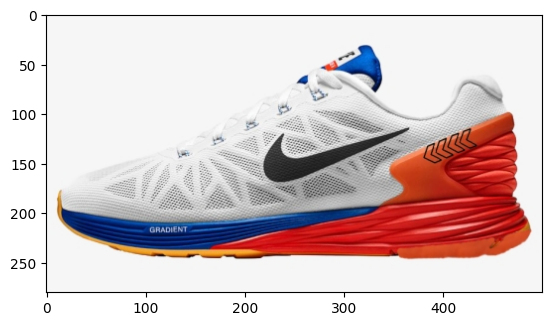

Created a chunk of size 869, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 654, which is longer than the specified 20
Created a chunk of size 594, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 660, which is longer than the specified 20
Created a chunk of size 516, which is longer than the specified 20
Created a chunk of size 528, which is longer than the specified 20


However, I'm a text-based AI model and cannot currently view images or download files from the internet. 

If you can provide me with information about the Nike shoe, such as its name, style, or color, I'd be happy to try and describe it. Alternatively, you can describe it to me, and I can provide a detailed description based on your information.


C:\Users\hp\AppData\Local\Temp\ipykernel_19432\3816206172.py:85: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = retriever.get_relevant_documents(image_description)


In [168]:
import os
import requests
from PIL import Image
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from dotenv import load_dotenv
from groq import Groq

# Load environment variables
load_dotenv()

# API Keys
grok_api_key = os.getenv("GROK_API_KEY")
HF_TOKEN = os.getenv("HF_TOKEN")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

def load_model(model_name):
    if model_name == "Gemma2":
        llm = ChatGroq(model="Gemma2-9b-It", groq_api_key=grok_api_key)
    else:
        llm = ChatGroq(model="llama-3.2-11b-vision-preview", groq_api_key=grok_api_key)
    return llm

# Model initialization
model_text = load_model("Gemma2")
model_vision = load_model("llama-3.2-11b-vision-preview")

def get_image(url, filename, extension):
    if not os.path.exists('content'):
        os.makedirs('content')
    content = requests.get(url).content
    file_path = f'content/{filename}.{extension}'
    with open(file_path, 'wb') as f:
        f.write(content)
    image = Image.open(file_path)
    return image

# Image URL
image_url = "https://png.pngitem.com/pimgs/s/555-5550642_nike-shoe-png-transparent-png.png"
image = get_image(image_url, "nike-shoes", "png")
plt.imshow(image)
plt.show()

# Process the image through the vision model
prompt = "Describe this Nike shoe."
client = Groq(api_key=grok_api_key)
completion = client.chat.completions.create(
    model="llama-3.2-11b-vision-preview",
    messages=[
        {"role": "user", "content": prompt},
        {"role": "user", "content": image_url}
    ],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=False,
    stop=None,
)
image_description = completion.choices[0].message.content
print(image_description)

# Load text data and process
loader = TextLoader("content/nike_shoes.txt")
text = loader.load()[0].page_content
from langchain.text_splitter import CharacterTextSplitter

def get_text_chunks_langchain(text):
    text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
    docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
    return docs

docs = get_text_chunks_langchain(text)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.from_documents(docs, embedding=embeddings)
retriever = vectorstore.as_retriever()

# Retrieve relevant documents using the image description
# retrieved_docs = retriever.retrieve(image_description)
retrieved_docs = retriever.get_relevant_documents(image_description)



In [170]:
from langchain.prompts import ChatPromptTemplate
template = """

{query}

Provide brief information and store location.
"""
prompt = ChatPromptTemplate.from_template(template)
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

# Prepare context for the RAG chain
context_text = "\n".join([doc.page_content for doc in retrieved_docs])

rag_chain = (
    {"context": context_text, "query": RunnablePassthrough()}
    | prompt
    | model_text
    | StrOutputParser()
)

query = "Can you provide details of this Nike sandal?"
result = rag_chain.invoke(query)
print(result)

# Full pipeline
full_chain = (
    RunnablePassthrough() | model_vision | StrOutputParser() | rag_chain
)

message = HumanMessage(
    content=f"Provide information on this Nike shoe: {image_url}"
)

try:
    result = full_chain.invoke([message])
    display(Markdown(result))
except Exception as e:
    print(f"Error: {e}")


try:
    result = full_chain.invoke([message])
    display(Markdown(result))
except Exception as e:
    print(f"Error: {e}")


TypeError: Expected a Runnable, callable or dict.Instead got an unsupported type: <class 'str'>

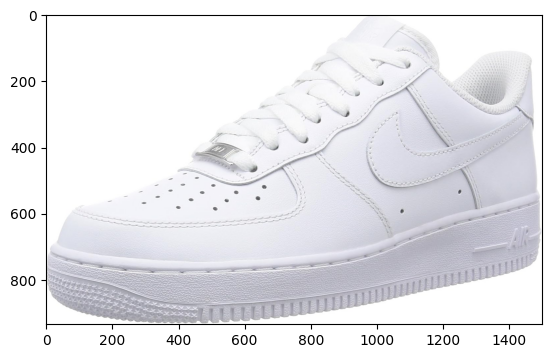

Created a chunk of size 869, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 654, which is longer than the specified 20
Created a chunk of size 594, which is longer than the specified 20
Created a chunk of size 588, which is longer than the specified 20
Created a chunk of size 660, which is longer than the specified 20
Created a chunk of size 516, which is longer than the specified 20
Created a chunk of size 528, which is longer than the specified 20


Based on the provided image, I can describe the following features of the Nike shoe:

1. **Model**: The shoe appears to be the Nike Air Force 1, a classic and iconic model from Nike.
2. **Colorway**: The primary color of the shoe is a predominantly black-colored upper, with the exception of the iconic white 'Swoosh' logo and the red/white Nike Air Force 1 box logo on the side.
3. **Material**: The shoe seems to have a predominantly canvas or suede-based upper, which is a common material used in the production of Air Force 1s.
4. **Sole**: The shoe has a white sole with visible Air units, which is the unique feature that sets the Air Force 1 apart from other Nike models. The swoosh on the side of the heel seems to be black-dyed.
5. **Details**: The shoe has a simple yet sleek design with the Air Force 1 branding on the side of the heel and a Nike tab on the inner tongue.
6. **Closure**: The shoe features a lace-up closure system with a black-colored eyelet and metal lace eyelet system.


c:\Users\hp\Desktop\kunal_repo\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\hp\AppData\Local\Temp\ipykernel_19088\424086931.py:84: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_docs = retriever.get_relevant_documents(image_description)


In [2]:
import os
import requests
from PIL import Image
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from dotenv import load_dotenv
from groq import Groq

# Load environment variables
load_dotenv()

# API Keys
grok_api_key = os.getenv("GROK_API_KEY")
HF_TOKEN = os.getenv("HF_TOKEN")
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

def load_model(model_name):
    if model_name == "Gemma2":
        llm = ChatGroq(model="Gemma2-9b-It", groq_api_key=grok_api_key)
    else:
        llm = ChatGroq(model="llama-3.2-11b-vision-preview", groq_api_key=grok_api_key)
    return llm

# Model initialization
model_text = load_model("Gemma2")
model_vision = load_model("llama-3.2-11b-vision-preview")

def get_image(url, filename, extension):
    if not os.path.exists('content'):
        os.makedirs('content')
    content = requests.get(url).content
    file_path = f'content/{filename}.{extension}'
    with open(file_path, 'wb') as f:
        f.write(content)
    image = Image.open(file_path)
    return image

# Image URL
image_url = "https://images-cdn.ubuy.co.in/64ada0cffc64d6627d002728-nike-unisex-adult-air-force-1.jpg"
image = get_image(image_url, "nike-shoes", "png")
plt.imshow(image)
plt.show()

# Process the image through the vision model
prompt = "Describe this Nike shoe."
client = Groq(api_key=grok_api_key)
completion = client.chat.completions.create(
    model="llama-3.2-11b-vision-preview",
    messages=[
        {"role": "user", "content": prompt},
        {"role": "user", "content": image_url}
    ],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=False,
    stop=None,
)
image_description = completion.choices[0].message.content
print(image_description)

# Load text data and process
loader = TextLoader("content/nike_shoes.txt")
text = loader.load()[0].page_content
from langchain.text_splitter import CharacterTextSplitter

def get_text_chunks_langchain(text):
    text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
    docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
    return docs

docs = get_text_chunks_langchain(text)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.from_documents(docs, embedding=embeddings)
retriever = vectorstore.as_retriever()

# Use get_relevant_documents method to retrieve relevant documents using the image description
retrieved_docs = retriever.get_relevant_documents(image_description)



In [3]:
from langchain.prompts import ChatPromptTemplate
template = """

{query}

Provide brief information and store location.
"""
prompt = ChatPromptTemplate.from_template(template)
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

# Prepare context for the RAG chain
context_text = "\n".join([doc.page_content for doc in retrieved_docs])

# Wrapping the context and query in a runnable object
class ContextRunnable(RunnableLambda):
    def __init__(self, context, query):
        super().__init__(lambda _: {"context": context, "query": query})

# Building the RAG chain with context
rag_chain = (
    ContextRunnable(context_text, RunnablePassthrough())
    | prompt
    | model_text
    | StrOutputParser()
)

query = "Can you provide details of this Nike sandal?"
result = rag_chain.invoke(query)
print(result)

# Full pipeline
full_chain = (
    RunnablePassthrough() | model_vision | StrOutputParser() | rag_chain
)

message = HumanMessage(
    content=f"Provide information on this Nike shoe: {image_url}"
)

try:
    result = full_chain.invoke([message])
    display(Markdown(result))
except Exception as e:
    print(f"Error: {e}")


Please provide me with the name of the store you are interested in. 

For example, you could ask:

"Provide brief information and store location for **Target**" 


I need to know which store you're asking about! 😊 




Please provide me with the name of the business or store you'd like information about. 

For example, you could ask:

"Provide brief information and store location for **Starbucks**" 
or
"Provide brief information and store location for the **Museum of Modern Art**" 


Let me know what you're looking for! 😊 



In [4]:
print(context_text)

Nike Air Force 1.
Here are some more details about the Nike Air Force 1:
Style: Low-top
Release date: 2004
Style code: AF1
Original retail price: $90 USD
The Air Force 1 is one of Nike's most sexy and enduring silhouettes. It was the first basketball shoe to feature Nike Air technology, providing exceptional cushioning and support.
The shoes are currently available for resale on the StockX marketplace for an average price of around $120 USD.
Nike Air Force 1 Store Location: "New Road, Kathmandu, bhutan".
\n\n\n
Nike slide/sandal.
They appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.
Here are some of the features:
Soft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.
Phylon midsole: The midsole is made of Phylon, which provides cushioning and support.
Rubber outsole: The outsole is made of rubber for traction and durability.
Swoosh logo: The Nike Swoosh logo is on the strap of the sandal.
Available in a variety of co